<a href="https://colab.research.google.com/github/ravishaaaan/vision_Assignment_2/blob/main/Assignment_2_4277.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Install & Import Libraries***

In [ ]:

!pip install opencv-python matplotlib


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu


# **Otsu’s Thresholding on Noisy Image**

***Create Synthetic Image with Two Objects and Background***

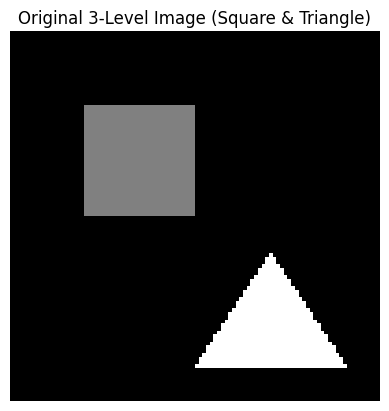

In [ ]:
# Create a 100x100 image with 3 intensity values (0=background, 100=square, 200=triangle)
img = np.zeros((100, 100), dtype=np.uint8)

# Create square (Object 1)
img[20:50, 20:50] = 100  # Square at top-left

# Create triangle (Object 2)
triangle_points = np.array([[70, 60], [90, 90], [50, 90]], dtype=np.int32)
cv2.fillPoly(img, [triangle_points], 200)  # Triangle at bottom-right

# Display the synthetic image
plt.imshow(img, cmap='gray')
plt.title("Original 3-Level Image (Square & Triangle)")
plt.axis('off')
plt.show()

***Add Gaussian Noise***

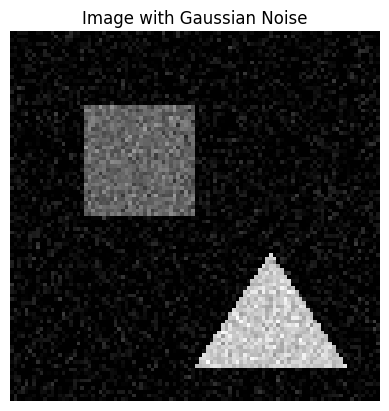

In [ ]:
# Add Gaussian noise to the image
mean = 0
std_dev = 20
gaussian_noise = np.random.normal(mean, std_dev, img.shape)
noisy_img = img + gaussian_noise
noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

# Show the noisy image
plt.imshow(noisy_img, cmap='gray')
plt.title("Image with Gaussian Noise")
plt.axis('off')
plt.show()

***Apply Otsu’s Thresholding***

Otsu's Threshold Value: 77


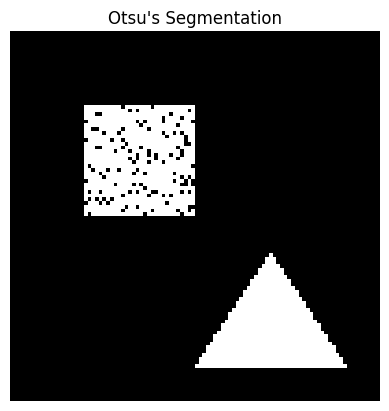

In [ ]:
# Apply Otsu's method to the noisy image
otsu_thresh = threshold_otsu(noisy_img)
otsu_result = (noisy_img > otsu_thresh).astype(np.uint8) * 255

# Display Otsu segmented image
print(f"Otsu's Threshold Value: {otsu_thresh}")
plt.imshow(otsu_result, cmap='gray')
plt.title("Otsu's Segmentation")
plt.axis('off')
plt.show()


# **Region Growing Segmentation**

***Create a New Test Image for Region Growing***

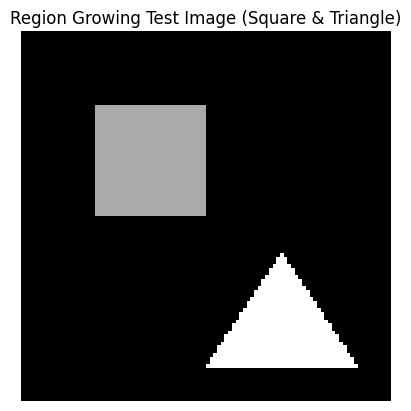

In [ ]:
# Create synthetic image with smooth regions
region_img = np.zeros((100, 100), dtype=np.uint8)
# Square (Object 1)
region_img[20:50, 20:50] = 100
# Triangle (Object 2)
cv2.fillPoly(region_img, [triangle_points], 150)

plt.imshow(region_img, cmap='gray')
plt.title("Region Growing Test Image (Square & Triangle)")
plt.axis('off')
plt.show()


***Region Growing Algorithm***

In [ ]:
def region_growing(img, seed_point, threshold=5):
    h, w = img.shape
    visited = np.zeros_like(img, dtype=bool)
    segmented = np.zeros_like(img, dtype=np.uint8)

    seed_value = img[seed_point]
    stack = [seed_point]

    while stack:
        x, y = stack.pop()
        if visited[x, y]:
            continue
        visited[x, y] = True

        if abs(int(img[x, y]) - int(seed_value)) <= threshold:
            segmented[x, y] = 255
            # Add 4-connected neighbors
            for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < h and 0 <= ny < w:
                    if not visited[nx, ny]:
                        stack.append((nx, ny))
    return segmented


***Apply Region Growing***

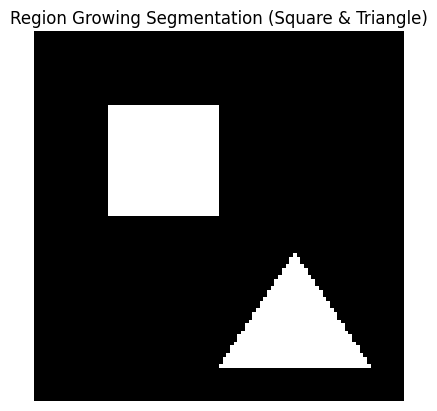

In [ ]:
# Define seed points and apply region growing
seed1 = (30, 30)  # Inside Square
seg1 = region_growing(region_img, seed1, threshold=10)

seed2 = (70, 70)  # Inside Triangle
seg2 = region_growing(region_img, seed2, threshold=10)

# Combine both segmented regions
combined_segmentation = np.maximum(seg1, seg2)

# Show final segmentation
plt.imshow(combined_segmentation, cmap='gray')
plt.title("Region Growing Segmentation (Square & Triangle)")
plt.axis('off')
plt.show()
